# PJ01

## Hypothesis: The average degree of difficulty for Comp 110 based on student ratings will be between a 5 and 6. 

(Autoreloads imported modules)

In [1]:
%reload_ext autoreload
%autoreload 2

Step 1: Convert csv data into a column-oriented data.

In [2]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

Step 2: Select the entire 'difficulty' rating column. I will test it by returning the first few rows.

In [3]:
from data_utils import head, select
section: dict[str, list[str]] = select(columns, ["difficulty"])
nums = head(section, 10)
nums

{'difficulty': ['5', '3', '5', '6', '4', '5', '6', '5', '5', '7']}

Step 3: Represent this as a visual table to confirm.

In [4]:
from tabulate import tabulate

tabulate(nums, nums.keys(), "html")

difficulty
5
3
5
6
4
5
6
5
5
7


Step 4: Count number of each response.

In [5]:
from data_utils import count

counter = count(section['difficulty'])
counter

{'5': 158, '3': 54, '6': 112, '4': 120, '7': 86, '2': 32, '1': 11}

Step 5: Create a visual representation of this data for comparison.

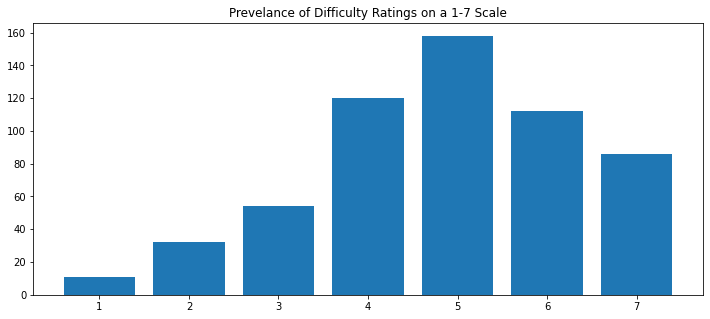

In [6]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, figsize=(12, 5), sharey=True)
numerical: dict = {'1': 11, '2': 32, '3': 54, '4': 120, '5': 158, '6': 112, '7': 86}

axes.set_title("Prevelance of Difficulty Ratings on a 1-7 Scale")
axes.bar(numerical.keys(), numerical.values())
axes.tick_params(axis='x', labelrotation = 0)

Step 6: Create and use helper function to form an average.

In [7]:
from data_utils import help_average
class_average = help_average(counter)
print(f"The average student rated difficulty rating for Comp110 is a {class_average}, on a 1 to 7 scale.")

The average student rated difficulty rating for Comp110 is a 4.853403141361256, on a 1 to 7 scale.


## Conclusion

My hypothesis originally predicted that students who participated in the Comp 110 survey would have an average response between 5 and 6 for degree of difficulty, with 1 being "very easy", and 7 being "very difficult". To test this, I converted the csv data into column-oriented data that could be passed through code. I then selected the "difficulty" row, created a test visual table, and then counted the number of times a value was present in the entire column. This formed a new dict that had the str rating bound to the int representing the number of times that value was seen. I then created a visual representation of this data. Finally, I created a helper function that used the keys as ints, multiplied them by their values, and divided them by the total number of responses to deliver an average. This average ended up being around 4.85. This was less, but still very close, to my hypothesis of a 5-6 average. I was also able to identify 5 as the mode through the dictionary and graph that I created. The graph was particularly interesting, as a it showed a left-skewed bell curve, with most responses being in the 4-7 range. Additionally, I was surprised at the low amount of 1 and 2 responses. 